In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('DF_Pre.csv')

In [4]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11
0,0,7.0,21.0,30.0,2.0,3.0,30.0,2.0,3.0,59.0,6.0,2.0,0.0
1,1,7.0,32.0,70.0,2.0,4.0,68.0,2.0,4.0,134.0,6.0,2.0,0.0
2,2,7.0,15.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,6.0,2.0,0.0
3,3,7.0,33.0,77.0,2.0,7.0,73.0,2.0,7.0,144.0,6.0,2.0,0.0
4,4,7.0,55.0,78.0,3.0,7.0,74.0,3.0,7.0,146.0,8.0,2.0,0.0


In [5]:
df.head

<bound method NDFrame.head of         Unnamed: 0    0     1     2    3     4     5    6     7      8    9  \
0                0  7.0  21.0  30.0  2.0   3.0  30.0  2.0   3.0   59.0  6.0   
1                1  7.0  32.0  70.0  2.0   4.0  68.0  2.0   4.0  134.0  6.0   
2                2  7.0  15.0   1.0  2.0   2.0   0.0  2.0   2.0    0.0  6.0   
3                3  7.0  33.0  77.0  2.0   7.0  73.0  2.0   7.0  144.0  6.0   
4                4  7.0  55.0  78.0  3.0   7.0  74.0  3.0   7.0  146.0  8.0   
...            ...  ...   ...   ...  ...   ...   ...  ...   ...    ...  ...   
357936      357936  7.0  25.0  46.0  2.0  15.0  46.0  4.0  15.0   92.0  9.0   
357937      357937  7.0  82.0  14.0  7.0  10.0   8.0  0.0  10.0   16.0  1.0   
357938      357938  7.0  82.0  14.0  7.0  10.0   8.0  0.0  10.0   17.0  2.0   
357939      357939  7.0  30.0  62.0  2.0  20.0  61.0  3.0  20.0  122.0  4.0   
357940      357940  7.0  30.0  62.0  2.0  20.0  62.0  4.0  20.0  123.0  9.0   

         10       11 

In [6]:
df = df.drop(columns="Unnamed: 0")

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.0,21.0,30.0,2.0,3.0,30.0,2.0,3.0,59.0,6.0,2.0,0.0
1,7.0,32.0,70.0,2.0,4.0,68.0,2.0,4.0,134.0,6.0,2.0,0.0
2,7.0,15.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,6.0,2.0,0.0
3,7.0,33.0,77.0,2.0,7.0,73.0,2.0,7.0,144.0,6.0,2.0,0.0
4,7.0,55.0,78.0,3.0,7.0,74.0,3.0,7.0,146.0,8.0,2.0,0.0


In [8]:
y = df.iloc[:,0].values
X = df.iloc[:,1:].values

## Splitting the dataset in 70:30 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 42)

## Logistic Regression

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,learning_curve
import matplotlib.pyplot as plt

In [11]:
pipe_lr = Pipeline([('scl', StandardScaler()),('clf', LogisticRegression(penalty='l2', random_state=0))])
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,X=X, y=y, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [12]:
for i in train_sizes:
    print(i)

57270
114540
171811
229081
286352


In [13]:
for i in train_mean:
    print(i)

0.9863314126069496
0.986624759909202
0.9861813271560027
0.9863393297567237
0.9882340615745655


In [14]:
for i in test_mean:
    print(i)

0.8868386334303769
0.8696122977480236
0.9778958089510186
0.9843214581799293
0.98802319594036


## Metric analyze

In [15]:
pipe_lr = pipe_lr.fit(X_train, y_train)

In [16]:
y_pred_train = pipe_lr.predict(X_train)

In [17]:
y_pred_test = pipe_lr.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_train, y_pred_train)

0.9880187421674822

In [20]:
accuracy_score(y_test, y_pred_test)

0.988210424368848

In [21]:
from sklearn.metrics import classification_report

In [22]:
target_names = ['Normal', 'DoSattack', 'scan', 'malitiousControl', 'malitiousOperation', 'spying', 'dataProbing', 'wrongSetUp']

In [23]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.96      0.65      0.77      4041
         DoSattack       1.00      0.59      0.74       240
              scan       0.98      0.93      0.95       620
  malitiousControl       0.84      0.48      0.61       562
malitiousOperation       0.89      0.44      0.59      1087
            spying       0.00      0.00      0.00       370
       dataProbing       0.91      1.00      0.95        90
        wrongSetUp       0.99      1.00      0.99    243548

          accuracy                           0.99    250558
         macro avg       0.82      0.64      0.70    250558
      weighted avg       0.99      0.99      0.99    250558



In [24]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.97      0.67      0.79      1739
         DoSattack       1.00      0.57      0.72       102
              scan       0.99      0.91      0.95       269
  malitiousControl       0.79      0.49      0.61       243
malitiousOperation       0.86      0.43      0.57       460
            spying       0.00      0.00      0.00       162
       dataProbing       0.91      1.00      0.96        32
        wrongSetUp       0.99      1.00      0.99    104376

          accuracy                           0.99    107383
         macro avg       0.81      0.63      0.70    107383
      weighted avg       0.99      0.99      0.99    107383



In [25]:
from sklearn.metrics import confusion_matrix
import itertools

In [26]:
cnf_matrix = confusion_matrix(y_test, y_pred_test)

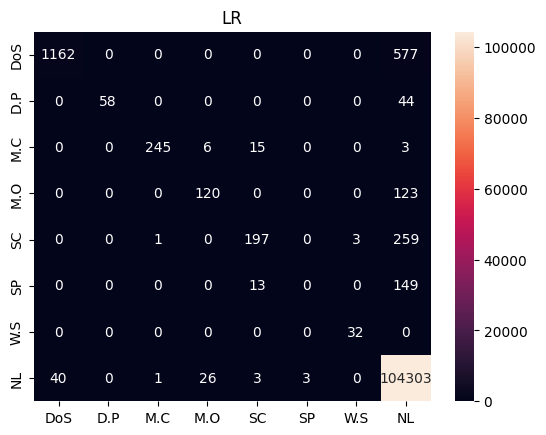

In [27]:
ax = sns.heatmap(cnf_matrix, annot=True, fmt="d")

# Define the new tick labels
new_labels = ["DoS", "D.P", "M.C", "M.O", "SC", "SP", "W.S", "NL"]

# Set the new tick labels for both axes
ax.set_xticklabels(new_labels)
ax.set_yticklabels(new_labels)


ax.set_title('LR')
plt.savefig("LR.jpg")
# Show the plot
plt.show()

## RandomForest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [29]:
pipe_rnd = Pipeline([('scl', StandardScaler()),('clf', RandomForestClassifier(n_estimators=10))])

In [ ]:
param_grid = {
    'clf__n_estimators': [50, 100],  # Example values for number of estimators
    'clf__max_depth': [None, 10, 20],  # Example values for max depth of trees
    # Add more hyperparameters to tune as needed
}

In [ ]:
grid_search = GridSearchCV(pipe_rnd, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


In [ ]:
best_estimator = grid_search.best_estimator_

In [30]:

train_sizes_rnd, train_scores_rnd, test_scores_rnd = learning_curve(estimator=pipe_rnd,X=X, y=y, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)

train_mean_rnd = np.mean(train_scores_rnd, axis=1)
train_std_rnd = np.std(train_scores_rnd, axis=1)
test_mean_rnd = np.mean(test_scores_rnd, axis=1)
test_std_rnd = np.std(test_scores_rnd, axis=1)

In [56]:
for i in train_sizes_rnd:
    print(i)

57270
114540
171811
229081
286352


In [31]:
for i in train_mean_rnd:
    print(i)

0.9866876200453991
0.9884634188929631
0.9906862773629163
0.9928566751498378
0.9942162094205733


In [32]:
for i in test_mean_rnd:
    print(i)

0.9457647099972462
0.9458904368453425
0.9801671312634014
0.9884813648200831
0.9932223805653226


In [33]:
pipe_rnd = pipe_rnd.fit(X_train, y_train)

In [34]:
y_pred_train = pipe_rnd.predict(X_train)
y_pred_test = pipe_rnd.predict(X_test)

In [35]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.994109148380814, 0.9944590857025786)

In [36]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.98      0.65      0.78      4041
         DoSattack       1.00      1.00      1.00       240
              scan       1.00      1.00      1.00       620
  malitiousControl       1.00      1.00      1.00       562
malitiousOperation       1.00      1.00      1.00      1087
            spying       1.00      1.00      1.00       370
       dataProbing       1.00      1.00      1.00        90
        wrongSetUp       0.99      1.00      1.00    243548

          accuracy                           0.99    250558
         macro avg       1.00      0.96      0.97    250558
      weighted avg       0.99      0.99      0.99    250558



In [37]:

print(classification_report(y_test, y_pred_test, target_names=target_names))



                    precision    recall  f1-score   support

            Normal       0.99      0.67      0.80      1739
         DoSattack       1.00      1.00      1.00       102
              scan       1.00      1.00      1.00       269
  malitiousControl       1.00      1.00      1.00       243
malitiousOperation       1.00      1.00      1.00       460
            spying       1.00      1.00      1.00       162
       dataProbing       1.00      1.00      1.00        32
        wrongSetUp       0.99      1.00      1.00    104376

          accuracy                           0.99    107383
         macro avg       1.00      0.96      0.97    107383
      weighted avg       0.99      0.99      0.99    107383



In [38]:
cnf_matrix = confusion_matrix(y_test, y_pred_test)

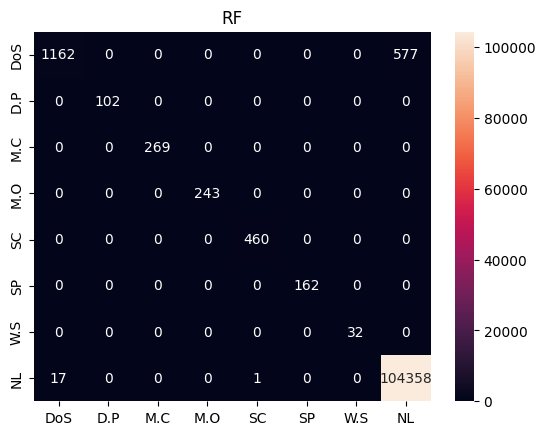

In [39]:
bax = sns.heatmap(cnf_matrix, annot=True, fmt="d")

# Define the new tick labels
new_labels = ["DoS", "D.P", "M.C", "M.O", "SC", "SP", "W.S", "NL"]

# Set the new tick labels for both axes
bax.set_xticklabels(new_labels)
bax.set_yticklabels(new_labels)


bax.set_title('RF')
plt.savefig("RF.jpg")
# Show the plot
plt.show()

In [ ]:
cnf_matrix

## ANN

In [40]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, alpha=1e-4, solver='adam', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.01)

In [41]:
pipe_mlp = Pipeline([('scl', StandardScaler()),('clf', mlp)])
train_sizes_mlp, train_scores_mlp, test_scores_mlp = learning_curve(estimator=pipe_mlp,X=X, y=y, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
train_mean_mlp = np.mean(train_scores_mlp, axis=1)
train_std_mlp = np.std(train_scores_mlp, axis=1)
test_mean_mlp = np.mean(test_scores_mlp, axis=1)
test_std_mlp = np.std(test_scores_mlp, axis=1)

In [42]:
for i in train_mean_mlp:
    print(i)

0.985353588266108
0.9884634188929631
0.9901310160583432
0.9928558020962018
0.9942155109794939


In [43]:
for i in test_mean_mlp:
    print(i)

0.9133682190042546
0.9056155306315725
0.9763005615252812
0.9887467723912721
0.9934626442576494


In [44]:
pipe_mlp = pipe_mlp.fit(X_train, y_train)
y_pred_train = pipe_mlp.predict(X_train)
y_pred_test = pipe_mlp.predict(X_test)

Iteration 1, loss = 0.04812890
Iteration 2, loss = 0.01863045
Iteration 3, loss = 0.01530565
Iteration 4, loss = 0.01354468
Iteration 5, loss = 0.01369359
Iteration 6, loss = 0.01345103
Iteration 7, loss = 0.01371228
Iteration 8, loss = 0.01340979
Iteration 9, loss = 0.01318144
Iteration 10, loss = 0.01330646
Iteration 11, loss = 0.01271194
Iteration 12, loss = 0.01259398
Iteration 13, loss = 0.01355640
Iteration 14, loss = 0.01261982
Iteration 15, loss = 0.01340351
Iteration 16, loss = 0.01285886
Iteration 17, loss = 0.01251214
Iteration 18, loss = 0.01296192
Iteration 19, loss = 0.01250669
Iteration 20, loss = 0.01289118
Iteration 21, loss = 0.01284879
Iteration 22, loss = 0.01257699
Iteration 23, loss = 0.01245634
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [45]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.994109148380814, 0.9944590857025786)

In [46]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.98      0.65      0.78      4041
         DoSattack       1.00      1.00      1.00       240
              scan       1.00      1.00      1.00       620
  malitiousControl       1.00      1.00      1.00       562
malitiousOperation       1.00      1.00      1.00      1087
            spying       1.00      1.00      1.00       370
       dataProbing       1.00      1.00      1.00        90
        wrongSetUp       0.99      1.00      1.00    243548

          accuracy                           0.99    250558
         macro avg       1.00      0.96      0.97    250558
      weighted avg       0.99      0.99      0.99    250558



In [47]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.99      0.67      0.80      1739
         DoSattack       1.00      1.00      1.00       102
              scan       1.00      1.00      1.00       269
  malitiousControl       1.00      1.00      1.00       243
malitiousOperation       1.00      1.00      1.00       460
            spying       1.00      1.00      1.00       162
       dataProbing       1.00      1.00      1.00        32
        wrongSetUp       0.99      1.00      1.00    104376

          accuracy                           0.99    107383
         macro avg       1.00      0.96      0.97    107383
      weighted avg       0.99      0.99      0.99    107383



In [48]:
cnf_matrix = confusion_matrix(y_test, y_pred_test)

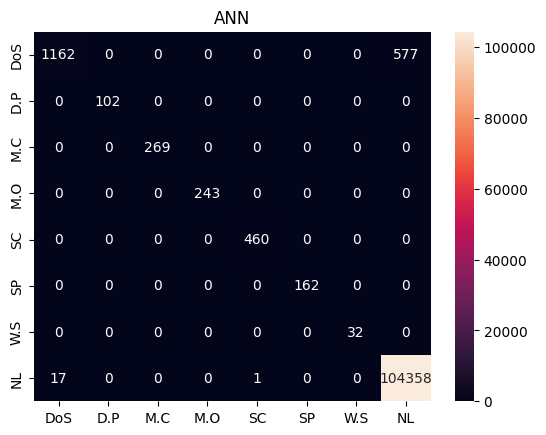

In [49]:
aax = sns.heatmap(cnf_matrix, annot=True, fmt="d")

# Define the new tick labels
new_labels = ["DoS", "D.P", "M.C", "M.O", "SC", "SP", "W.S", "NL"]

# Set the new tick labels for both axes
aax.set_xticklabels(new_labels)
aax.set_yticklabels(new_labels)


aax.set_title('ANN')
plt.savefig("ANN.jpg")
# Show the plot
plt.show()

In [ ]:
cnf_matrix

# Decision Tree

In [69]:
from sklearn import tree

In [75]:
pipe_tree = Pipeline([('scl', StandardScaler()),('clf', tree.DecisionTreeClassifier())])
train_sizes_tree, train_scores_tree, test_scores_tree = learning_curve(estimator=pipe_tree,X=X, y=y, train_sizes=np.linspace(0.2,1.0,5), cv=10, n_jobs=-1)
train_mean_tree = np.mean(train_scores_tree, axis=1)
train_std_tree = np.std(train_scores_tree, axis=1)
test_mean_tree = np.mean(test_scores_tree, axis=1)
test_std_tree = np.std(test_scores_tree, axis=1)

In [76]:
for i in train_mean_tree:
    print(i)

0.9867062968539011
0.987331015536482
0.9906874233652548
0.993015567523941
0.9942169078616528


In [77]:
for i in test_mean_tree:
    print(i)

0.9688523714914659
0.8898558986589176
0.9812958050225834
0.9877773347282357
0.9941024123832933


In [78]:
pipe_tree = pipe_tree.fit(X_train, y_train)
y_pred_train = pipe_tree.predict(X_train)
y_pred_test = pipe_tree.predict(X_test)

In [79]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.994109148380814, 0.9944683981635827)

In [80]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.98      0.65      0.78      4041
         DoSattack       1.00      1.00      1.00       240
              scan       1.00      1.00      1.00       620
  malitiousControl       1.00      1.00      1.00       562
malitiousOperation       1.00      1.00      1.00      1087
            spying       1.00      1.00      1.00       370
       dataProbing       1.00      1.00      1.00        90
        wrongSetUp       0.99      1.00      1.00    243548

          accuracy                           0.99    250558
         macro avg       1.00      0.96      0.97    250558
      weighted avg       0.99      0.99      0.99    250558



In [81]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.99      0.67      0.80      1739
         DoSattack       1.00      1.00      1.00       102
              scan       1.00      1.00      1.00       269
  malitiousControl       1.00      1.00      1.00       243
malitiousOperation       1.00      1.00      1.00       460
            spying       1.00      1.00      1.00       162
       dataProbing       1.00      1.00      1.00        32
        wrongSetUp       0.99      1.00      1.00    104376

          accuracy                           0.99    107383
         macro avg       1.00      0.96      0.97    107383
      weighted avg       0.99      0.99      0.99    107383



In [82]:
cnf_matrix = confusion_matrix(y_test, y_pred_test)

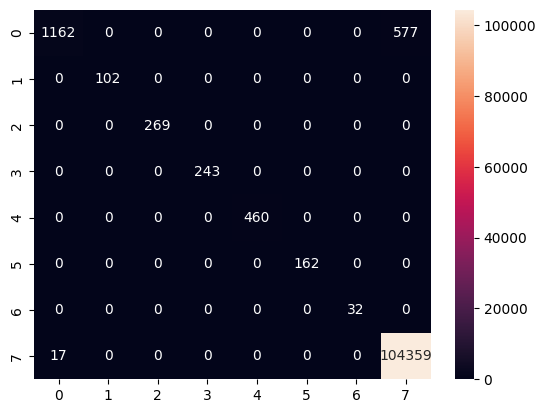

In [83]:
dax = sns.heatmap(cnf_matrix, annot=True, fmt="d")

# Define the new tick labels
new_labels = ["DoS", "D.P", "M.C", "M.O", "SC", "SP", "W.S", "NL"]

# Set the new tick labels for both axes
aax.set_xticklabels(new_labels)
aax.set_yticklabels(new_labels)


aax.set_title('DT')
plt.savefig("DT.jpg")
# Show the plot
plt.show()

In [61]:
train_scores

array([[0.98657238, 0.98608346, 0.98617077, 0.98641523, 0.98641523],
       [0.99011699, 0.98574297, 0.9856382 , 0.98581282, 0.98581282],
       [0.9916187 , 0.98872016, 0.98291728, 0.98416865, 0.98348185],
       [0.9897067 , 0.98713555, 0.98393581, 0.98389216, 0.98702642],
       [0.99087836, 0.98919861, 0.98660739, 0.98656549, 0.98792046]])

In [62]:
train_scores_rnd

array([[0.98672953, 0.98648507, 0.98672953, 0.98674699, 0.98674699],
       [0.9926314 , 0.98990746, 0.98658111, 0.98659857, 0.98659857],
       [0.99508763, 0.99327168, 0.9883593 , 0.9883593 , 0.98835348],
       [0.99612801, 0.99475731, 0.9910643 , 0.9910643 , 0.99126946],
       [0.99686749, 0.99577094, 0.99281304, 0.99281653, 0.99281304]])

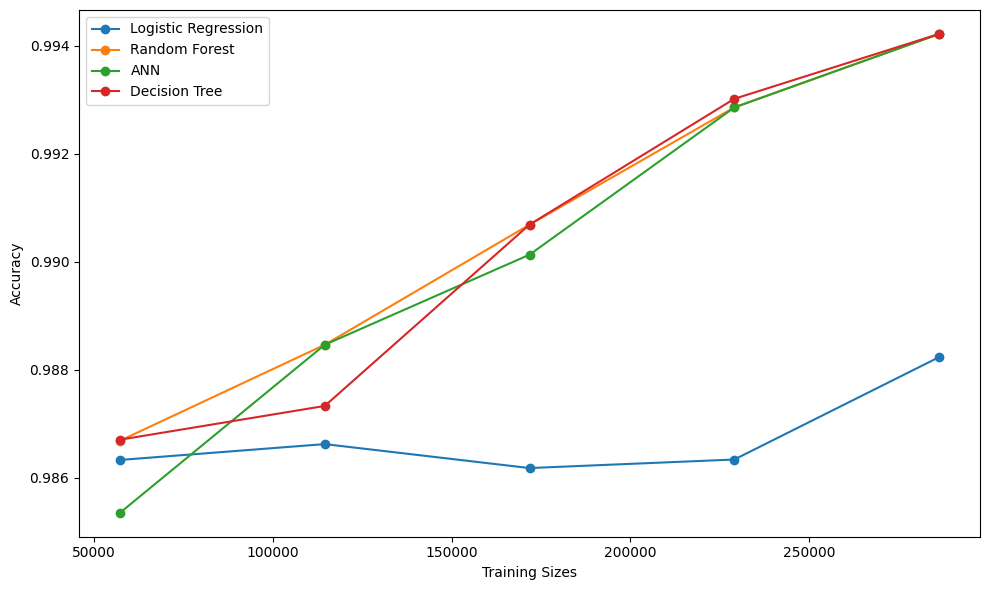

In [84]:
 plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, marker='o', label='Logistic Regression')
plt.plot(train_sizes, train_mean_rnd, marker='o', label='Random Forest')
plt.plot(train_sizes, train_mean_mlp, marker='o', label='ANN')
plt.plot(train_sizes, train_mean_tree, marker='o', label='Decision Tree')

# Title and labels
# plt.title('Model Performance vs. Training Sizes')
plt.xlabel('Training Sizes')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("train_acc.jpg")
# Show plot
plt.tight_layout()
plt.show()

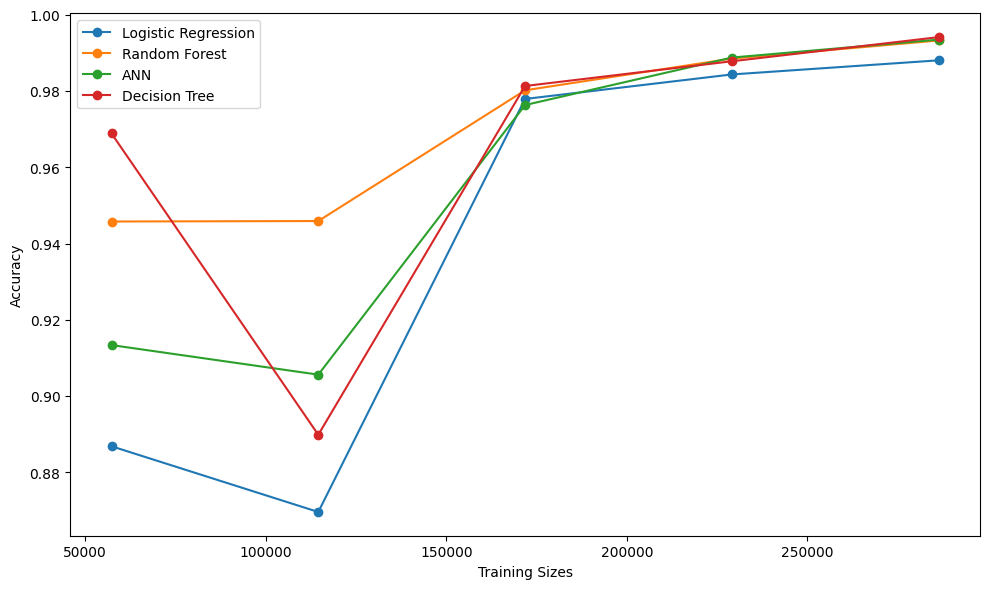

In [85]:
 plt.figure(figsize=(10, 6))
plt.plot(train_sizes, test_mean, marker='o', label='Logistic Regression')
plt.plot(train_sizes, test_mean_rnd, marker='o', label='Random Forest')
plt.plot(train_sizes, test_mean_mlp, marker='o', label='ANN')
plt.plot(train_sizes, test_mean_tree, marker='o', label='Decision Tree')
# Title and labels
# plt.title('Model Performance vs. Training Sizes')
plt.xlabel('Training Sizes')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("test_acc.jpg")
# Show plot
plt.tight_layout()
plt.show()

# XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
pipe_xgb = Pipeline([('scl', StandardScaler()), ('clf', XGBClassifier())])

In [ ]:
train_sizes_xgb, train_scores_xgb, test_scores_xgb = learning_curve(estimator=pipe_xgb, X=X, y=y, 
                                                                    train_sizes=np.linspace(0.2, 1.0, 5), 
                                                                    cv=5, n_jobs=-1,error_score='raise')

In [ ]:
train_mean_xgb = np.mean(train_scores_xgb, axis=1)
train_std_xgb = np.std(train_scores_xgb, axis=1)
test_mean_xgb = np.mean(test_scores_xgb, axis=1)
test_std_xgb = np.std(test_scores_xgb, axis=1)

In [ ]:
from sklearn.datasets import load_wine
from sklearn.utils import resample
import numpy as np

# Load Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Check class distribution
unique, counts = np.unique(y, return_counts=True)
print("Class Distribution Before Balancing:")
print(dict(zip(unique, counts)))

# Find the class with the least samples
min_samples = np.min(counts)

# Resample each class to have the same number of samples as the class with the least samples
balanced_X = []
balanced_y = []
for class_label in np.unique(y):
    X_class = X[y == class_label]
    X_class_resampled = resample(X_class, replace=False, n_samples=min_samples, random_state=42)
    balanced_X.extend(X_class_resampled)
    balanced_y.extend([class_label] * min_samples)

balanced_X = np.array(balanced_X)
balanced_y = np.array(balanced_y)

# Check class distribution after balancing
unique_balanced, counts_balanced = np.unique(balanced_y, return_counts=True)
print("\nClass Distribution After Balancing:")
print(dict(zip(unique_balanced, counts_balanced)))
